In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_theme(style="whitegrid", palette="pastel")

In [67]:
df = pd.read_csv("Car Sales.xlsx - car_data.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


<Axes: >

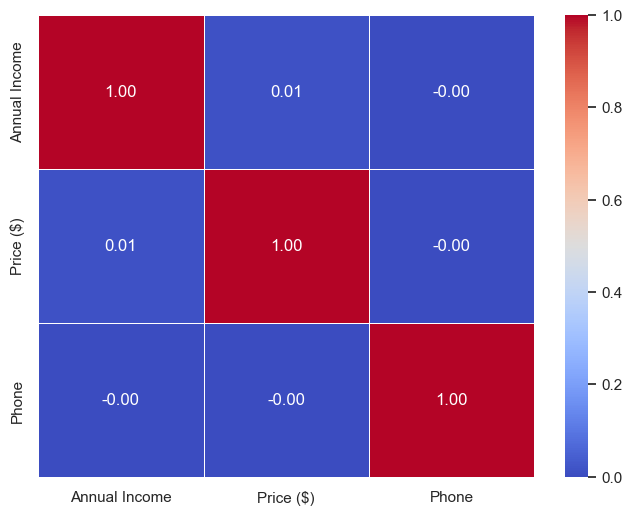

In [68]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(
    corr,
    annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm', # Choose a color map (e.g., 'coolwarm', 'viridis', 'RdBu')
    fmt=".2f",       # Format the annotations to two decimal places
    linewidths=.5    # Add lines between cells for better visual separation
)

In [69]:
df = df.drop(columns=["Customer Name", "Car_id", "Phone", "Dealer_No "], axis=1)
print(df.columns)
df.isna().sum()

Index(['Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Body Style',
       'Dealer_Region'],
      dtype='object')


Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Body Style     23906 non-null  object
 11  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.2+ MB


In [71]:
df["Model"].unique()

array(['Expedition', 'Durango', 'Eldorado', 'Celica', 'TL', 'Diamante',
       'Corolla', 'Galant', 'Malibu', 'Escort', 'RL', 'Pathfinder',
       'Grand Marquis', '323i', 'Sebring Coupe', 'Forester', 'Accent',
       'Land Cruiser', 'Accord', '4Runner', 'I30', 'A4', 'Carrera Cabrio',
       'Jetta', 'Viper', 'Regal', 'LHS', 'LW', '3000GT', 'SLK230',
       'Civic', 'S-Type', 'S40', 'Mountaineer', 'Park Avenue',
       'Montero Sport', 'Sentra', 'S80', 'Lumina', 'Bonneville',
       'C-Class', 'Altima', 'DeVille', 'Stratus', 'Cougar', 'SW', 'C70',
       'SLK', 'Tacoma', 'M-Class', 'A6', 'Intrepid', 'Sienna', 'Eclipse',
       'Contour', 'Town car', 'Focus', 'Mustang', 'Cutlass', 'Corvette',
       'Impala', 'Cabrio', 'Dakota', '300M', '328i', 'Bravada', 'Maxima',
       'Ram Pickup', 'Concorde', 'V70', 'Quest', 'ES300', 'SL-Class',
       'Explorer', 'Prizm', 'Camaro', 'Outback', 'Taurus', 'Cavalier',
       'GS400', 'Monte Carlo', 'Sonata', 'Sable', 'Metro', 'Voyager',
       'Cirrus

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns.tolist():
    df[col] = le.fit_transform(df[col])


In [73]:
df

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,11,1,13500,0,8,60,0,0,0,26000,3,4
1,11,1,1480000,1,7,52,0,0,0,19000,3,0
2,11,1,1035000,2,4,57,1,1,2,31500,2,2
3,11,1,13500,4,27,36,1,1,1,14000,3,5
4,11,1,1465000,3,0,141,0,0,2,24500,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23901,198,1,13500,1,21,150,1,1,2,12000,2,5
23902,198,0,900000,21,5,109,0,0,0,16000,0,4
23903,198,1,705000,4,2,4,1,1,2,21000,4,6
23904,198,1,13500,3,5,93,0,0,0,31000,2,1


In [74]:
df["Date"] = pd.to_datetime(df["Date"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  int32         
 2   Annual Income  23906 non-null  int64         
 3   Dealer_Name    23906 non-null  int32         
 4   Company        23906 non-null  int32         
 5   Model          23906 non-null  int32         
 6   Engine         23906 non-null  int32         
 7   Transmission   23906 non-null  int32         
 8   Color          23906 non-null  int32         
 9   Price ($)      23906 non-null  int64         
 10  Body Style     23906 non-null  int32         
 11  Dealer_Region  23906 non-null  int32         
dtypes: datetime64[ns](1), int32(9), int64(2)
memory usage: 1.4 MB


<Axes: >

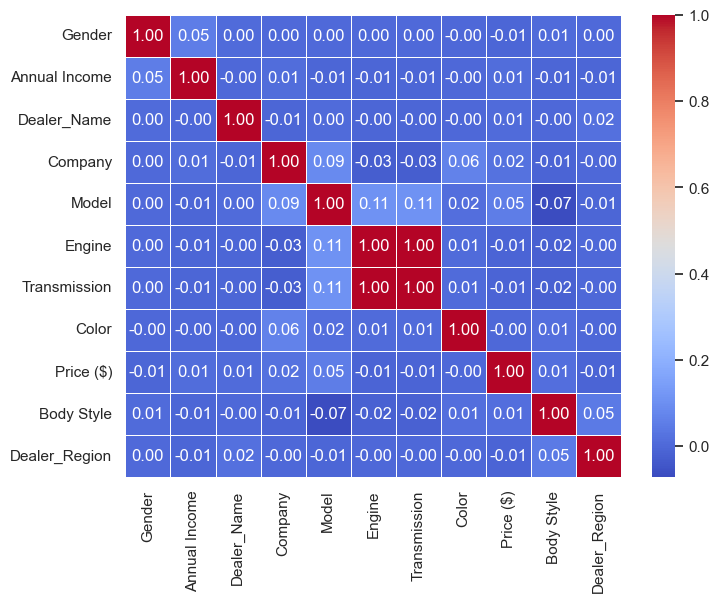

In [76]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(
    corr,
    annot=True,      # Show the correlation values on the heatmap
    cmap='coolwarm', # Choose a color map (e.g., 'coolwarm', 'viridis', 'RdBu')
    fmt=".2f",       # Format the annotations to two decimal places
    linewidths=.5    # Add lines between cells for better visual separation
)

In [77]:
px.histogram(df, "Annual Income")

In [78]:
px.histogram(df, "Gender", color="Gender", text_auto=True)

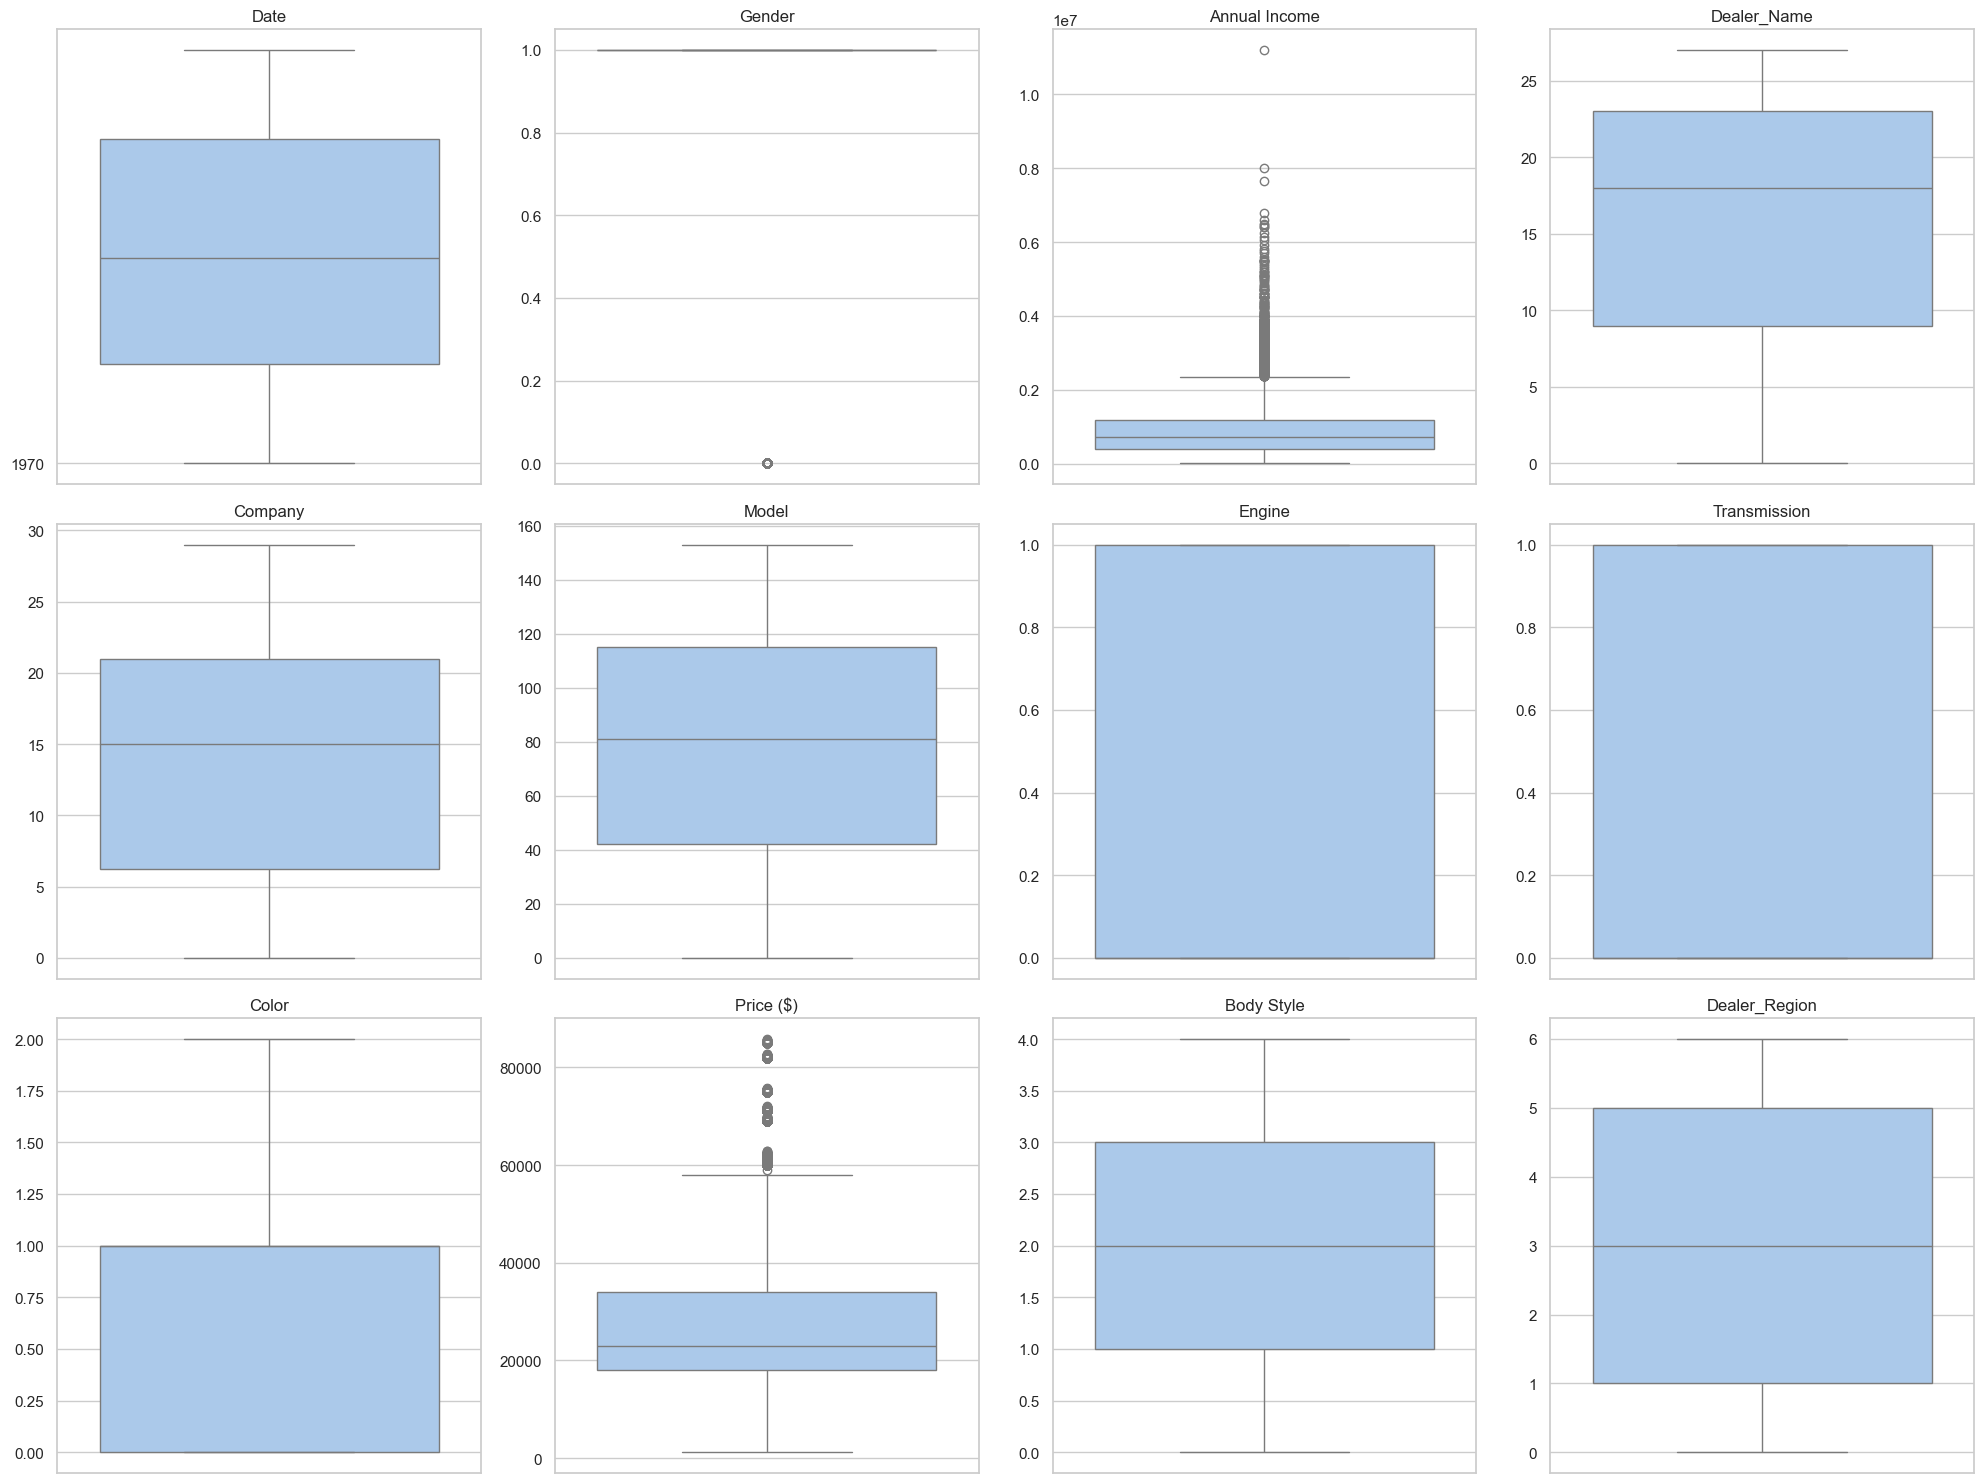

In [79]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(df, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature}')
    plt.ylabel('')

plt.tight_layout()
plt.show()